In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fig.mplstyle')
save_dir = "/home/supercgor/gitfile/texfile/Modern_Physics_Lab/7.1/fig"
data_name = "data.xlsx"
from scipy.optimize import curve_fit

In [2]:
A = pd.read_excel(f"{save_dir}/{data_name}", 0)
B = pd.read_excel(f"{save_dir}/{data_name}", 1)
C = pd.read_excel(f"{save_dir}/{data_name}", 2)
Aa = A.iloc[:,0].to_numpy()
Ab = A.iloc[:,1].to_numpy()
Ac = A.iloc[:,2].to_numpy()
Ad = A.iloc[:,3].to_numpy()
Ad = Ad/np.nanmax(Ad)
Ba = B.iloc[:,0].to_numpy()
Bb = B.iloc[:,0].to_numpy()
Bb = Bb/np.nanmax(Bb)
Ca = C.iloc[:,0].to_numpy()
Cb = C.iloc[:,1].to_numpy()
Ca = Ca/np.nanmax(Ca)
Cc = Cb - np.nanmin(Cb)
Cc = np.sin(2*np.pi*Cc/49.29)
Cc = np.clip(Cc, 0, np.inf)

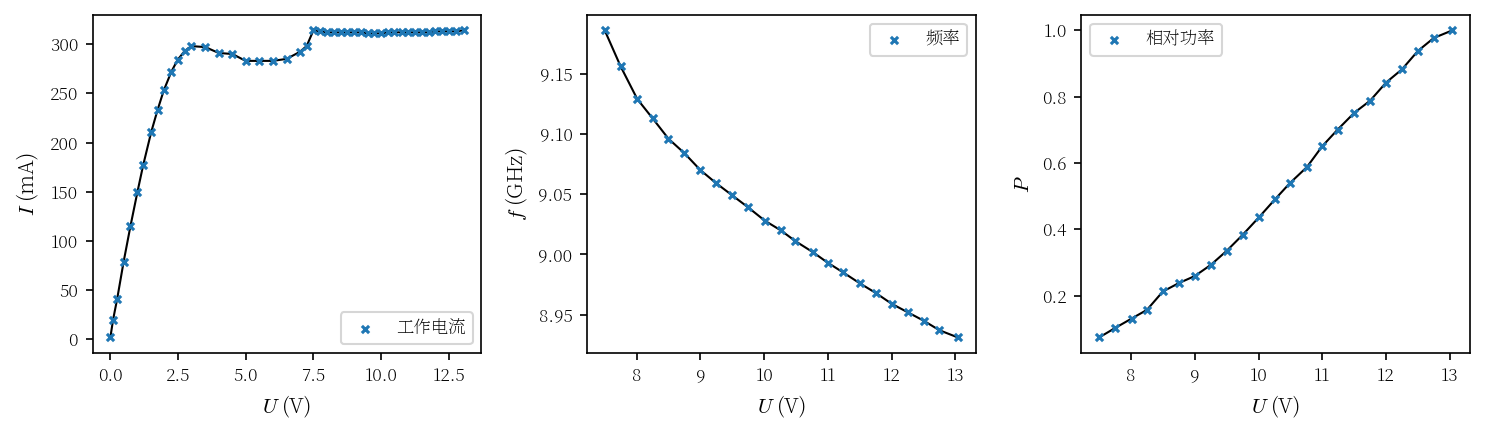

In [8]:
a = plt.subplot(131)
b = plt.subplot(132)
c = plt.subplot(133)
# 拟合曲线
Aaa = np.linspace(Aa.min(),Aa.max(), 100)#插入点
# 插值函数
# fa = interp1d(Aa, Ab, kind="cubic")
# fb = interp1d(Aa, Ac, kind="cubic")
# fc = interp1d(Aa, Ad, kind="cubic")
# 画结果
a.plot(Aa, Ab, color="black",linewidth=1)
b.plot(Aa, Ac, color="black",linewidth=1)     
c.plot(Aa, Ad, color="black",linewidth=1)
# 散点图
a.scatter(Aa, Ab, marker='x', s=12, label="工作电流", zorder=2)
b.scatter(Aa, Ac, marker='x', s=12, label="频率", zorder=2)
c.scatter(Aa, Ad, marker='x', s=12, label="相对功率", zorder=2)
# 名称
a.set_xlabel("$U$ (V)")
b.set_xlabel("$U$ (V)")
c.set_xlabel("$U$ (V)")
a.set_ylabel("$I$ (mA)")
b.set_ylabel("$f$ (GHz)")
c.set_ylabel("$P$")
# 显示label
a.legend()
b.legend()
c.legend()
plt.tight_layout()

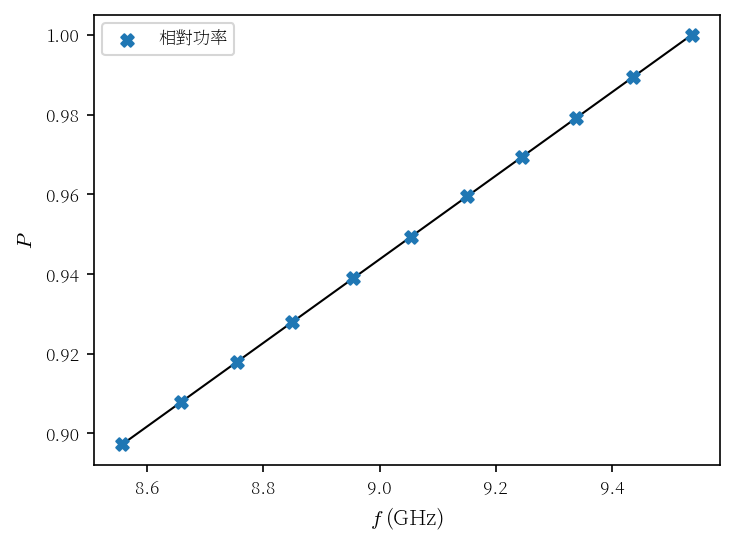

In [4]:
plt.rcParams["figure.figsize"] = (5,3.75)
plt.scatter(Ba,Bb, zorder=2, marker="X", label="相對功率")
plt.plot(Ba,Bb, color="black", linewidth=1, zorder = 1)
plt.xlabel("$f$ (GHz)")
plt.ylabel("$P$")
plt.legend()
plt.tight_layout()

In [5]:
### define the fit functions, y = a * x^b ###
def target_func(x, a, b):
    return a*(x**b)
 
### curve fit ###
popt, pcov  = curve_fit(target_func, Cc, Ca)
 
### Calculate R Square ###
calc_ydata = [target_func(i, popt[0], popt[1]) for i in Cc]
res_ydata  = np.array(Ca) - np.array(calc_ydata)
ss_res     = np.sum(res_ydata**2)
ss_tot     = np.sum((Ca - np.mean(Ca))**2)
r_squared  = 1 - (ss_res / ss_tot)
print(f"a = {popt[0]}  b = {popt[1]}   R2 = {r_squared}")

a = 1.0102265697733677  b = 1.972370395746131   R2 = 0.9846788315297551


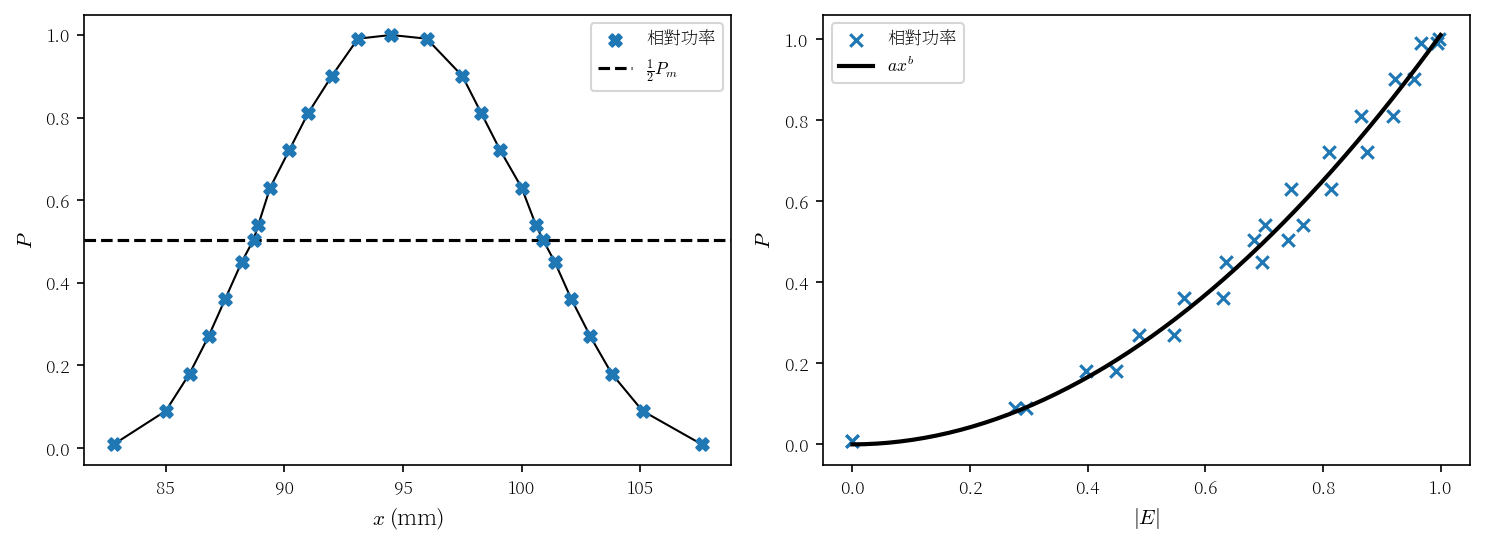

In [7]:
aplt = plt.subplot(121)
bplt = plt.subplot(122)
aplt.scatter(Cb,Ca, zorder=2, marker="X", label="相對功率")
aplt.plot(Cb,Ca, color="black", linewidth=1, zorder = 1)
aplt.axhline((np.nanmax(Ca) + np.nanmin(Ca))/2, linestyle="--", color="black", zorder = 1, label = r"$\frac{1}{2}P_m$")
aplt.set_xlabel("$x$ (mm)")
aplt.set_ylabel("$P$")
aplt.legend()
bplt.scatter(Cc,Ca, zorder=0, marker="x", label="相對功率")
fit = np.linspace(0,1)
bplt.plot(fit, popt[0] * fit ** popt[1], color="black", linewidth=2, zorder = 1, label="$ax^b$")
bplt.set_xlabel("$|E|$")
bplt.set_ylabel("$P$")
bplt.legend()
plt.rcParams["figure.figsize"] = (10,3)
plt.tight_layout()